In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp

from sir_model import *

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


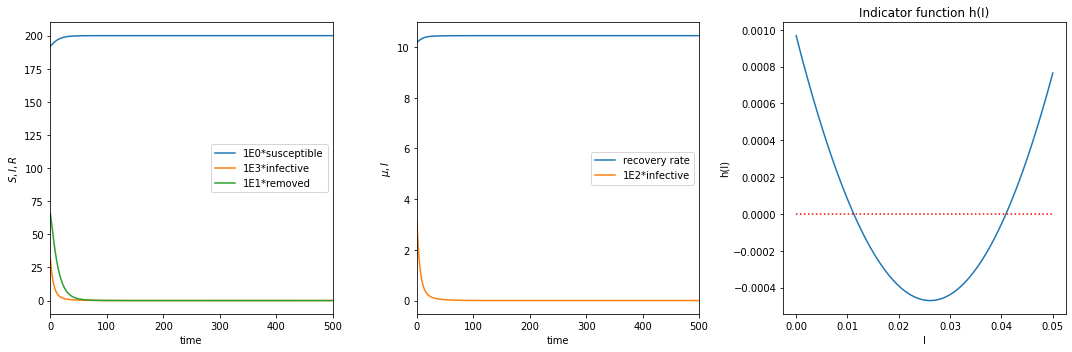

In [12]:
# parameters
random_state = 12345
t_0 = 0
t_end = 5000
# NT = t_end-t_0
NT = t_end-t_0

# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.022 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(sol.t, sol.y[0]-0*sol.y[0][0], label='1E0*susceptible');
ax[0].plot(sol.t, 1e3*sol.y[1]-0*sol.y[1][0], label='1E3*infective');
ax[0].plot(sol.t, 1e1*sol.y[2]-0*sol.y[2][0], label='1E1*removed');
ax[0].set_xlim([0, 500])
ax[0].legend();
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")

ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
ax[1].plot(sol.t, 1e2*sol.y[1], label='1E2*infective');
ax[1].set_xlim([0, 500])
ax[1].legend();
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

I_h = np.linspace(-0.,0.05,100)
ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b));
ax[2].plot(I_h, 0*I_h, 'r:')
#ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")

fig.tight_layout()

In [27]:
def three_dimension_visualization(t_0=t_0, b=0.022, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu):
    """
    visualize the trajactory of the SIR curve in 3-D space.

    input:
    - t_0: start time
    - b: num of beds per 10000 people
    - mu0: min of mu
    - mu1: max of mu
    - A: birth rate
    - d: death rate
    - nu: disease-induced death rate

    output: None
    """
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection="3d")
    time = np.linspace(t_0,10000,50000)
    
    # cmap = ["BuPu", "Purples", "bwr"]
    color_list = ['black', 'green', 'blue']

    SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-');
    # ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=2, c='red', zorder=-1);
    # ax.scatter(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], marker='D',c=color_list[0], s=200, zorder=1);
    # ax.scatter(sol.y[0][0], sol.y[1][0], sol.y[2][0], marker='x',c=color_list[0], s=200,zorder=0);


    SIM0 = [195.7, 0.03, 3.92] # what happens with this initial condition when b=0.022?
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.plot(sol.y[0], sol.y[1], sol.y[2], 'g-');
    # ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=2, c=color_list[1]);
    # ax.scatter(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], marker='D',c=color_list[1], s=200, zorder=1);
    # ax.scatter(sol.y[0][0], sol.y[1][0], sol.y[2][0], marker='x',c=color_list[1], s=200,zorder=0);

    SIM0 = [193, 0.08, 6.21] # what happens with this initial condition when b=0.022?
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.plot(sol.y[0], sol.y[1], sol.y[2], 'b-');
    # ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=2,c=color_list[2]);
    # ax.scatter(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], marker='D',c=color_list[2], s=200, zorder=1);
    # ax.scatter(sol.y[0][0], sol.y[1][0], sol.y[2][0], marker='x',c=color_list[2], s=200,zorder=0);

    ax.set_xlabel("S")
    ax.set_ylabel("I")
    ax.set_zlabel("R")

    ax.set_title("SIR trajectory (3d)"+ ', b=' +str(b)) 
    fig.tight_layout()

In [23]:
def two_dimension_visualization(t_0=t_0, b=0.022, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu):
    """
    visualize the trajactory of the SIR curve in 3-D space.

    input:
    - t_0: start time
    - b: num of beds per 10000 people
    - mu0: min of mu
    - mu1: max of mu
    - A: birth rate
    - d: death rate
    - nu: disease-induced death rate

    output: None
    """
    NT = 5000
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    time = np.linspace(t_0,50000,NT)

    # cmap = ["BuPu", "Purples", "bwr"]
    color_list = ['black', 'green', 'blue']

    SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.scatter(sol.y[0], sol.y[1], s=2, c='red', zorder=-1);
    ax.scatter(sol.y[0][-1], sol.y[1][-1], marker='D', color=color_list[0], s=200);
    ax.scatter(sol.y[0][0], sol.y[1][0], marker='x', color=color_list[0], s=200);


    SIM0 = [195.7, 0.03, 3.92] # what happens with this initial condition when b=0.022?
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.scatter(sol.y[0], sol.y[1], s=2,  c=color_list[1]);
    ax.scatter(sol.y[0][-1], sol.y[1][-1], marker='D', c=color_list[1], s=200);
    ax.scatter(sol.y[0][0], sol.y[1][0], marker='x', c=color_list[1], s=200);

    SIM0 = [193, 0.08, 6.21] # what happens with this initial condition when b=0.022?
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.scatter(sol.y[0], sol.y[1], s=2, c=color_list[2]);
    ax.scatter(sol.y[0][-1], sol.y[1][-1], marker='D',c=color_list[2], s=200);
    ax.scatter(sol.y[0][0], sol.y[1][0], marker='x',c=color_list[2], s=200);

    ax.set_xlabel("S")
    ax.set_ylabel("I")

    ax.set_title("SIR trajectory (2d)" + ', b=' +str(b)) 
    fig.tight_layout()

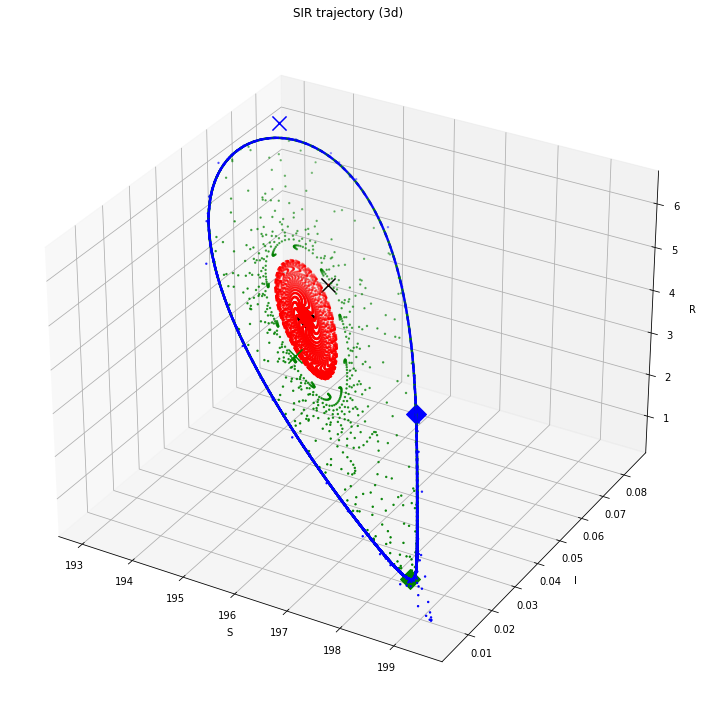

In [160]:
three_dimension_visualization(t_0=t_0, b=0.022, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu)

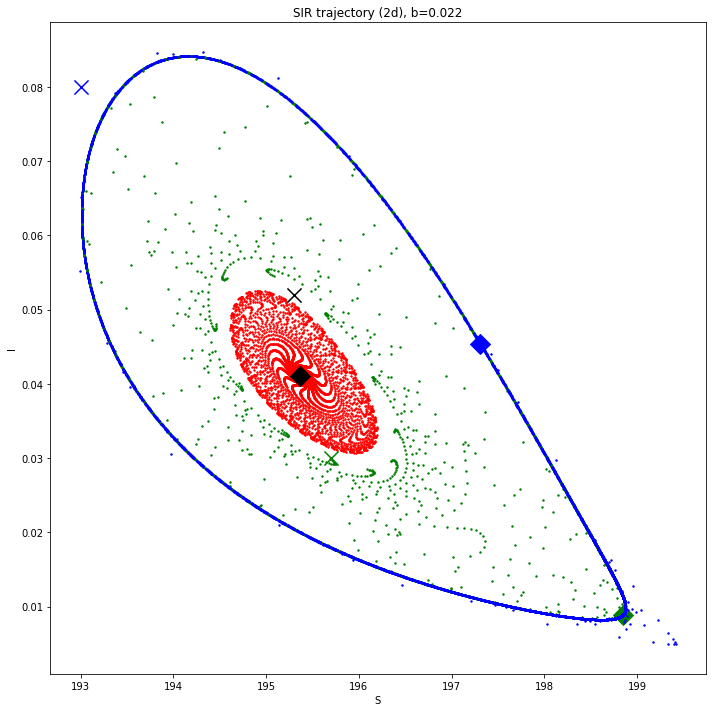

In [5]:
two_dimension_visualization(t_0=t_0, b=0.022, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu)

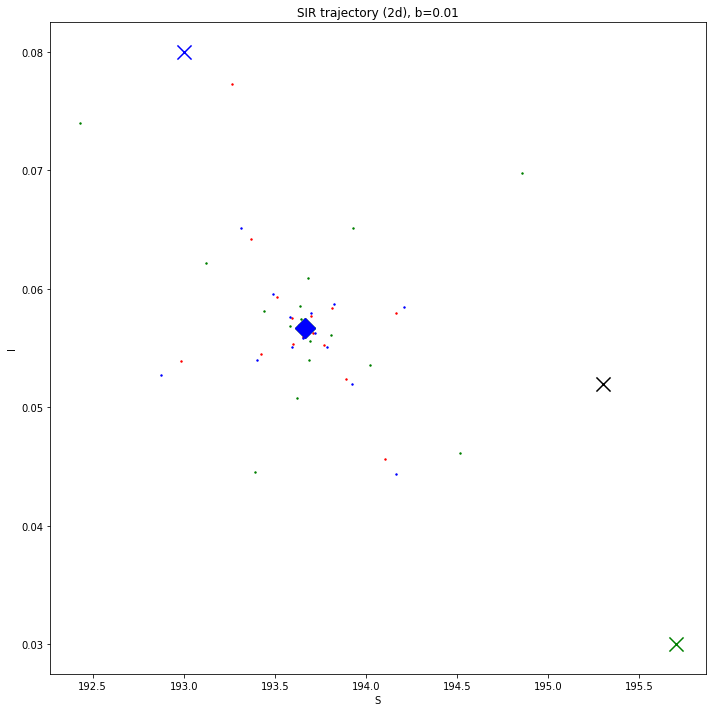

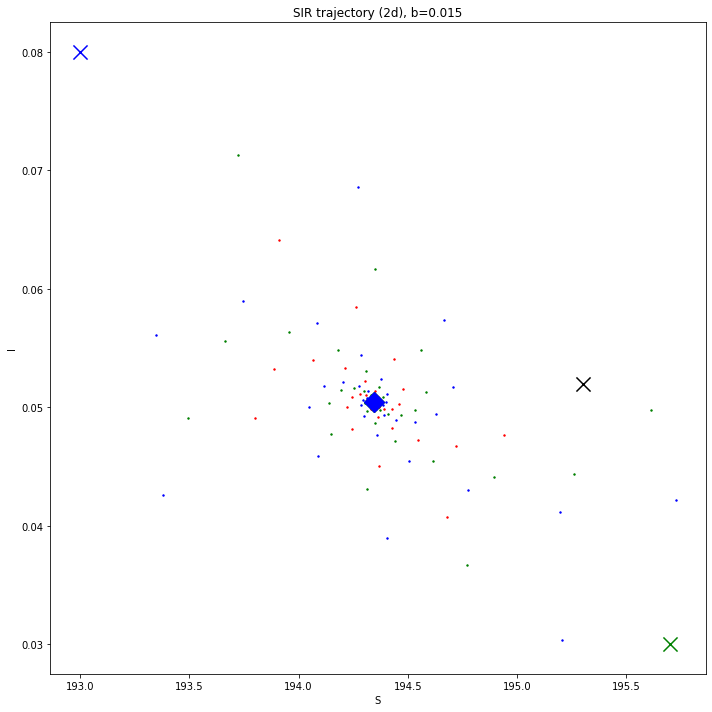

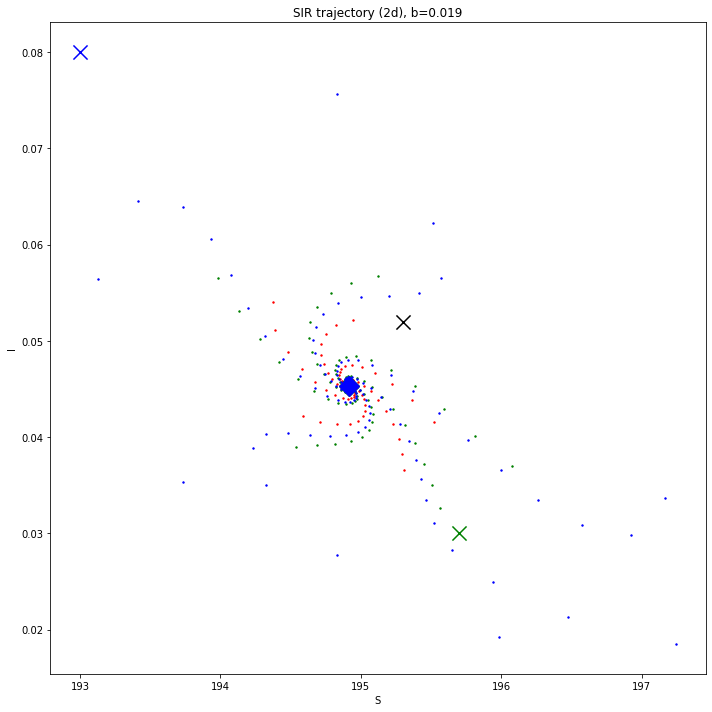

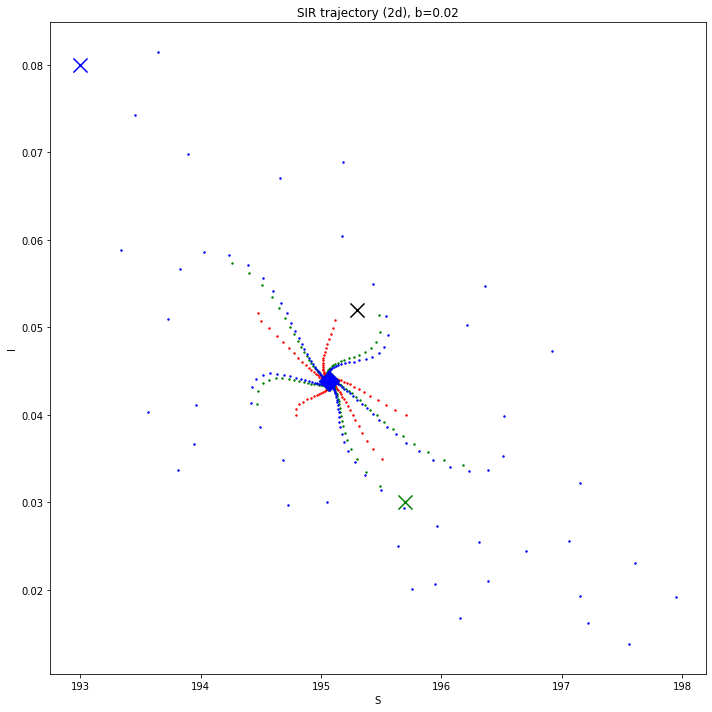

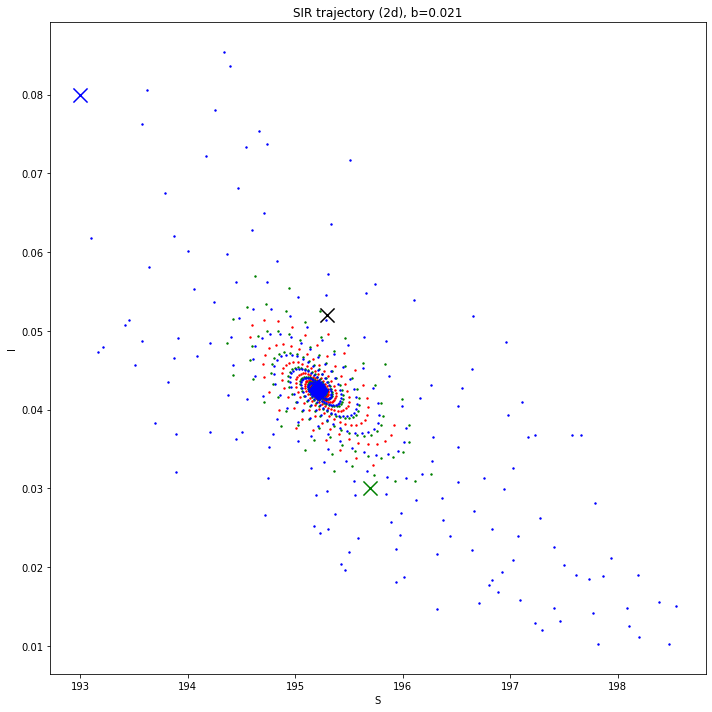

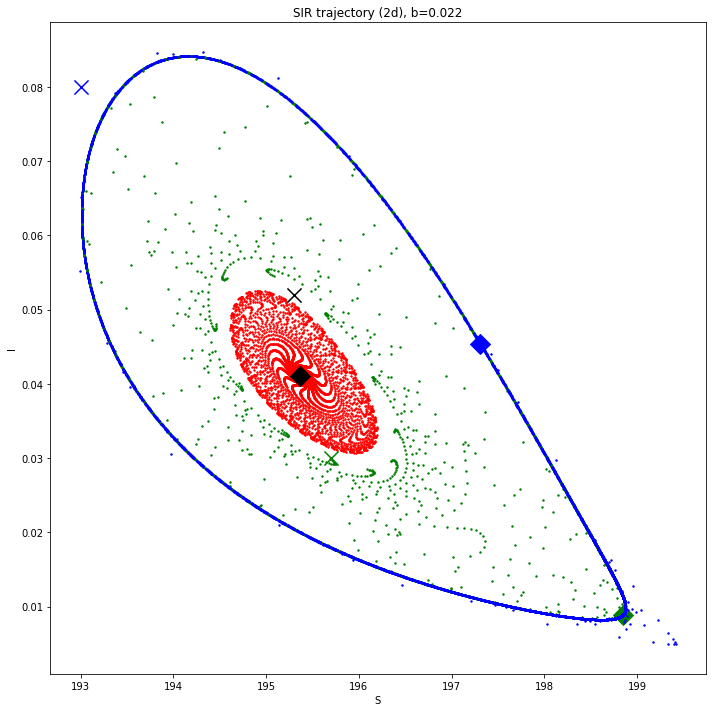

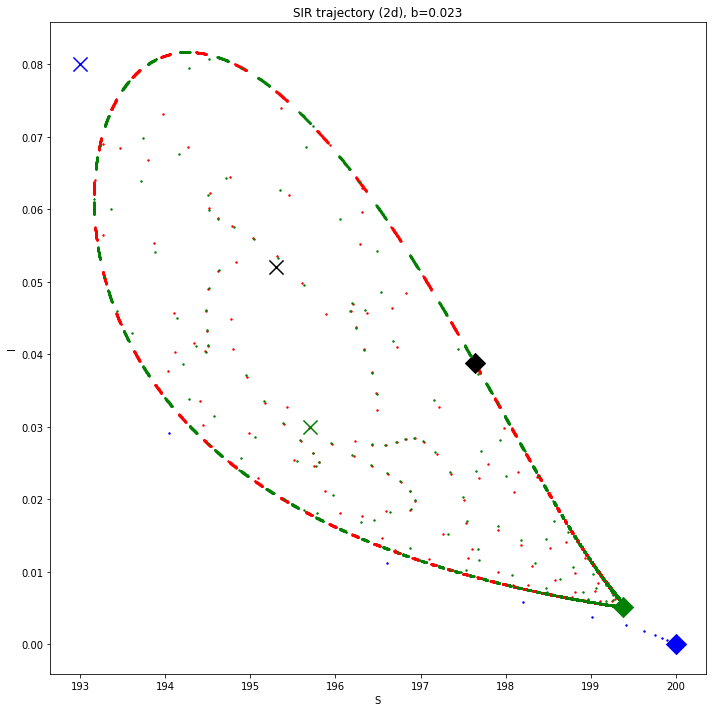

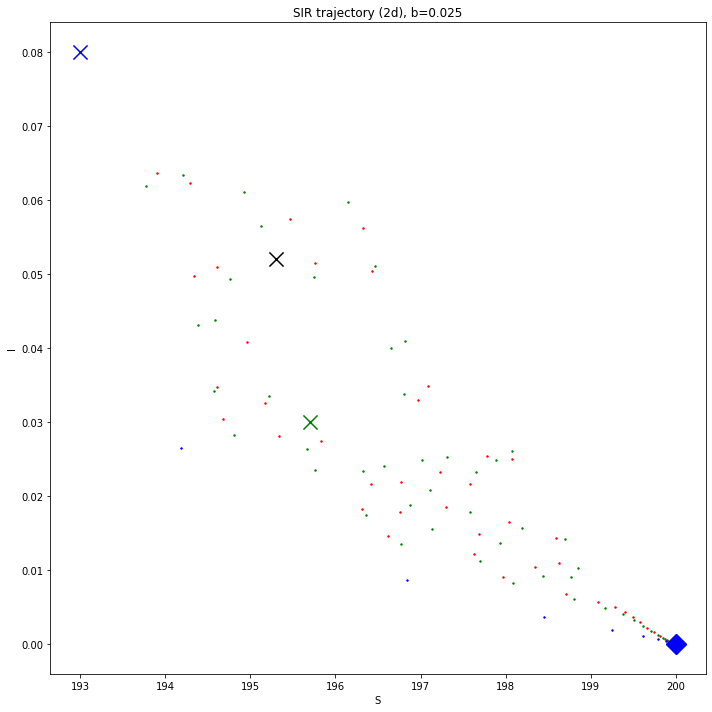

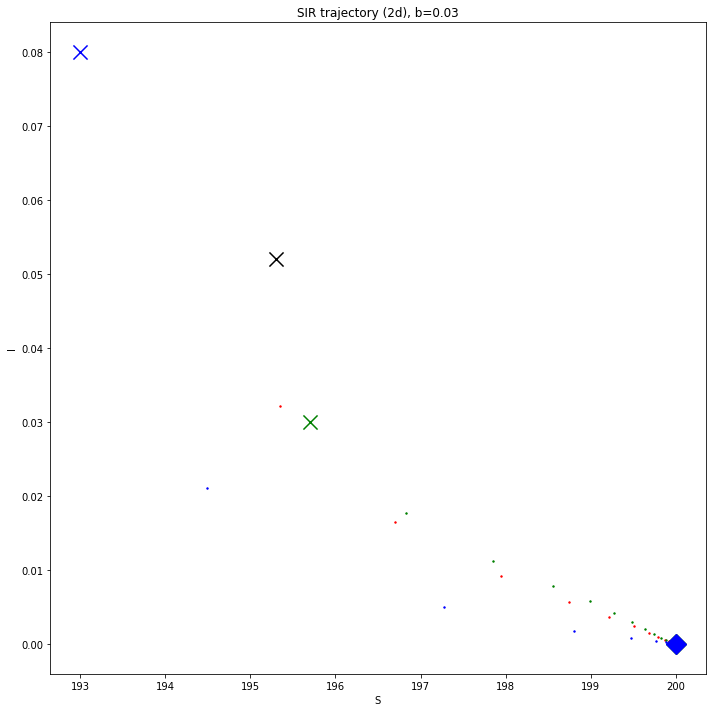

In [7]:
for b in [0.01, 0.015, 0.019, 0.02, 0.021, 0.022, 0.023, 0.025, 0.03]:
    two_dimension_visualization(t_0=t_0, b=b, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu)

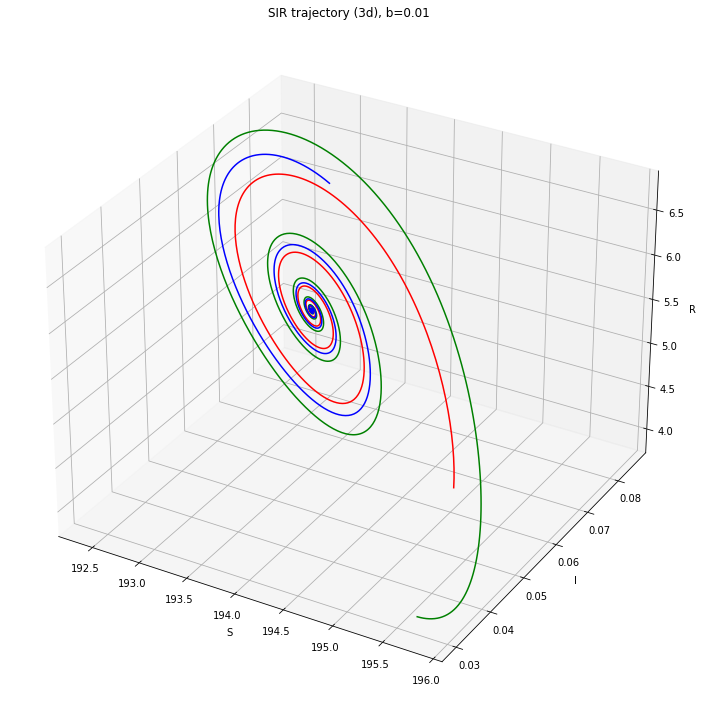

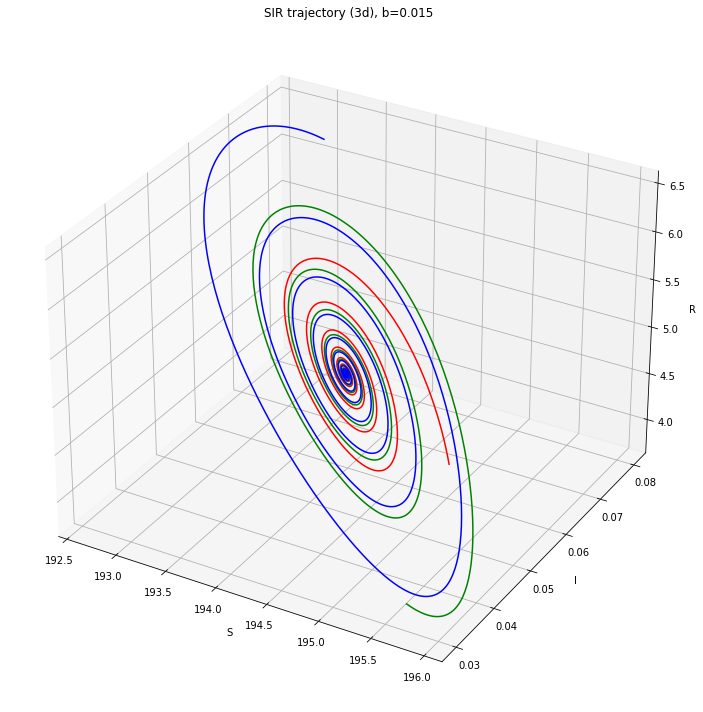

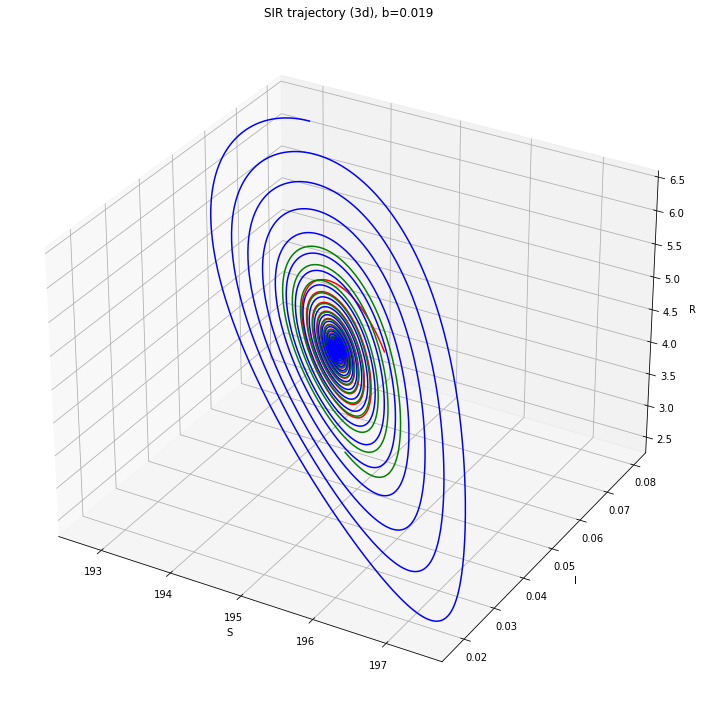

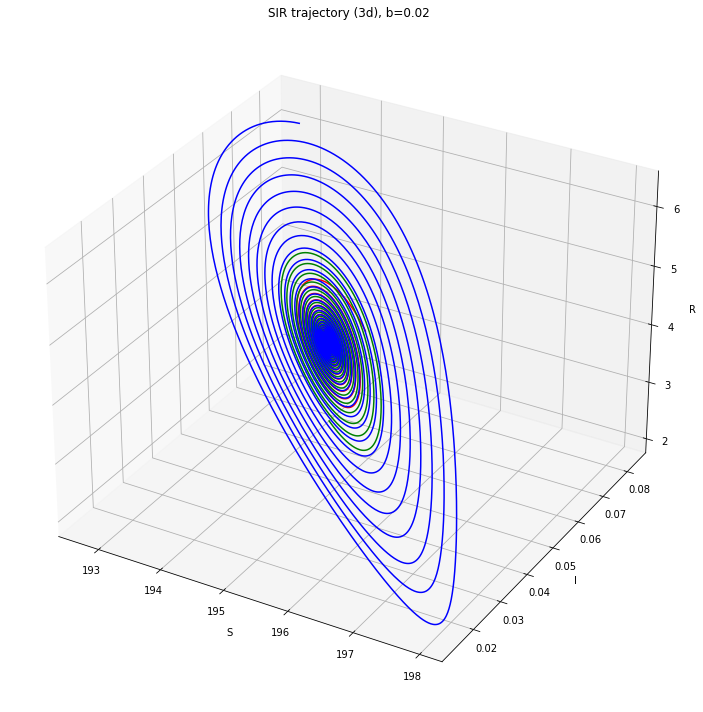

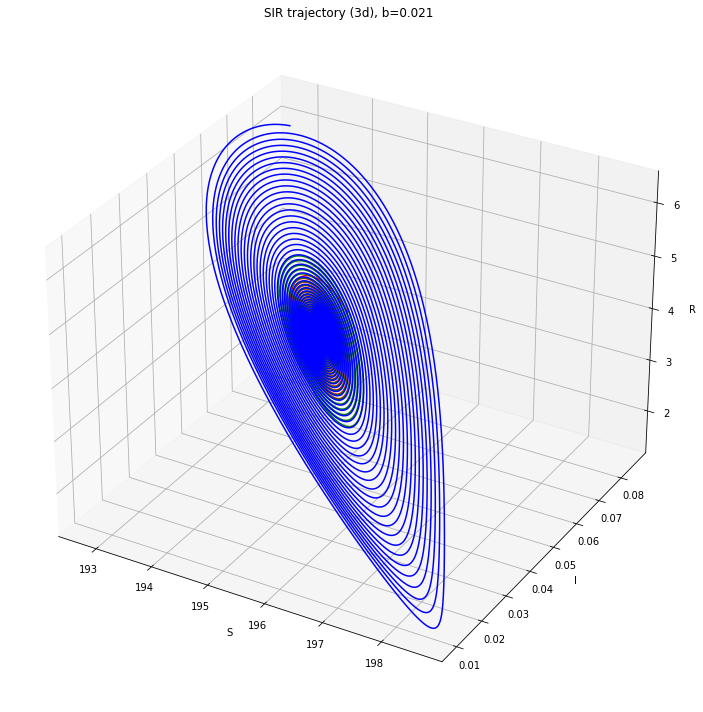

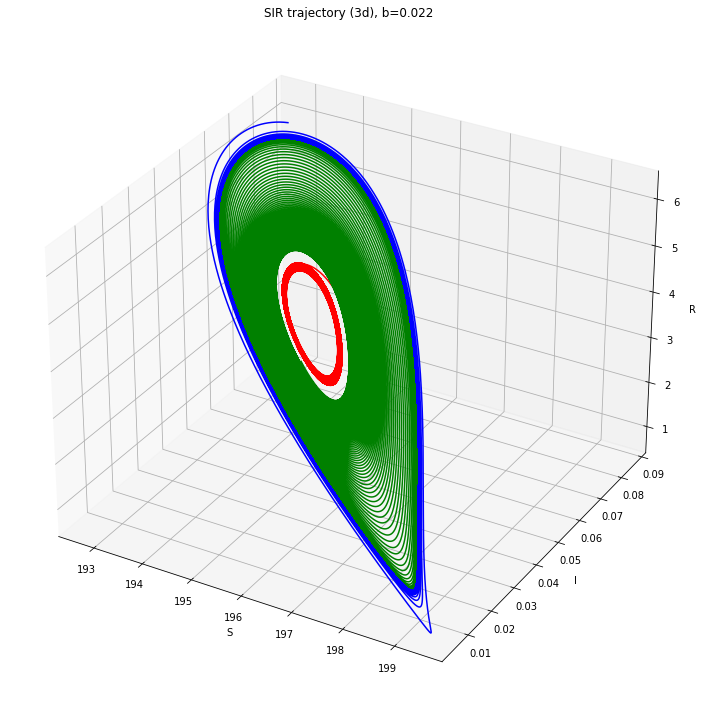

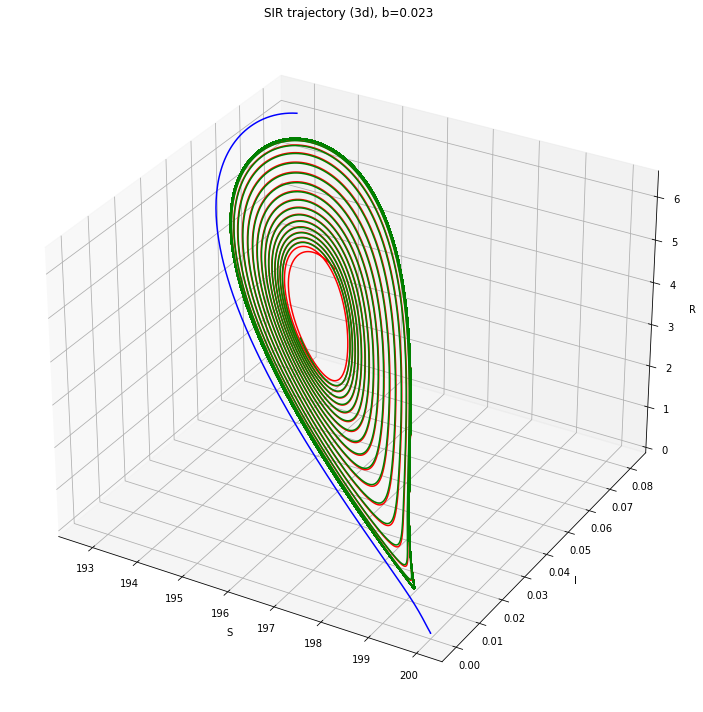

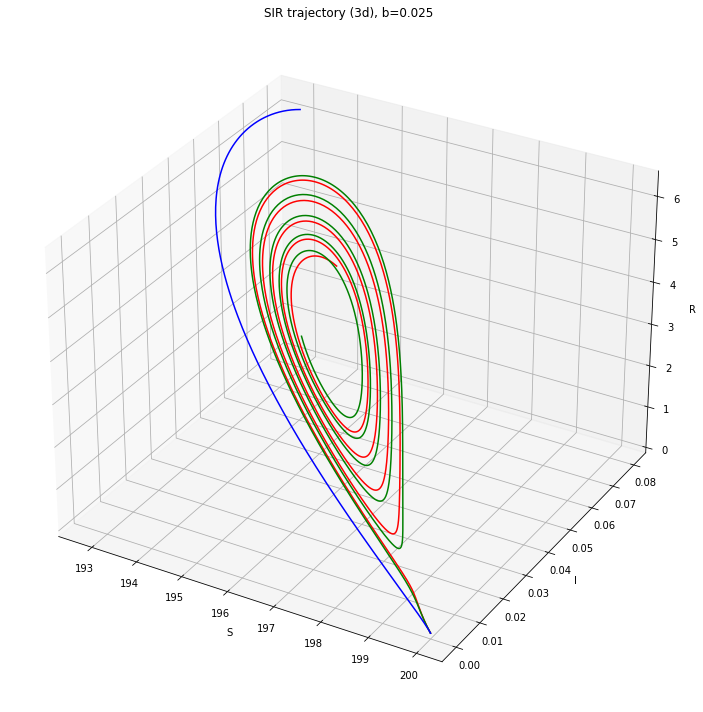

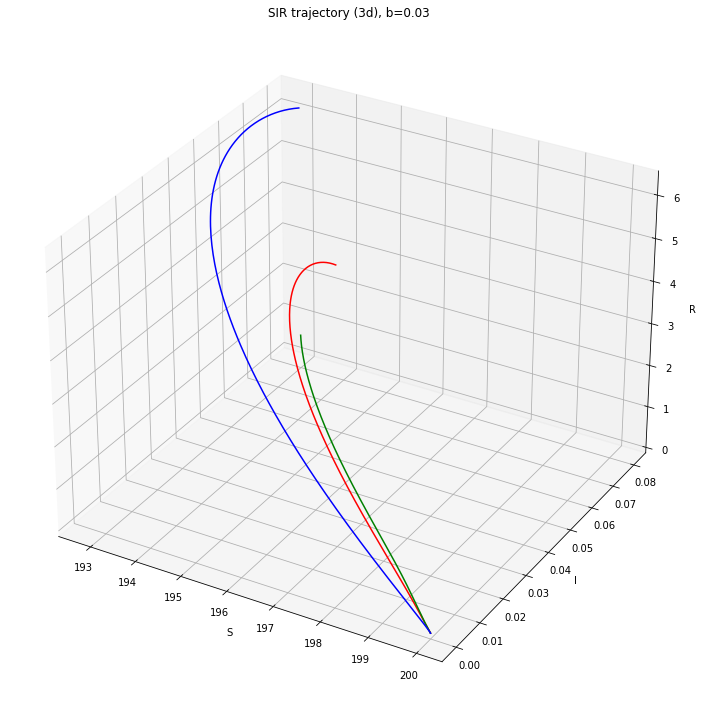

In [28]:
for b in [0.01, 0.015, 0.019, 0.02, 0.021, 0.022, 0.023, 0.025, 0.03]:
    three_dimension_visualization(t_0=t_0, b=b, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu)